## Final Project Code

In [141]:
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster 
import scipy.interpolate as interpolate

In [280]:
def initialize_centroids(df,K):
    random_ids = np.random.permutation(df.shape[0])
    centroids = df.iloc[random_ids[:K]]
    return centroids

def distance(pt1, pt2):
    """Return the distance between two points, represented as arrays"""
    return np.sqrt(sum((pt1 - pt2)**2))


# calculate distances to centroids
def compute_distance(df, centroids):
    K=centroids.shape[0]
    distances_ar = np.zeros((df.shape[0], K))
    
    # we used a similar approach  in developing kNN

    for k in range(K):
        point=centroids.iloc[k]        
        def distance_from_point(row):
            return distance(point, np.array(row))
        distances_ar[:,k] = df.apply(distance_from_point,axis=1).values
    return distances_ar

def compute_sse(df, labels, centroids,K):
    distances_ar = np.zeros(df.shape[0])
    for k in range(K):
        point=centroids.iloc[k]        
        def distance_from_point(row):
            return distance(point, np.array(row))
        distances_ar[labels == k] = df[labels == k].apply(distance_from_point,axis=1).values
    return np.sum(distances_ar)

def compute_centroids(df, labels, K):
        centroids = np.zeros((K, df.shape[1]))
        for k in range(K):
            centroids[k, :] = df[labels == k].mean()
        return centroids
    
def Kmeans_sse(df,K):
    #define the maximum number of iterations
    max_iter=20
    
    #initialize centroids
    centroids=initialize_centroids(df,K)
    
    for i in range(max_iter):
            old_centroids = centroids
            dist_matrix = compute_distance(df, old_centroids)
            clust=np.argmin(dist_matrix, axis=1)
            #print(compute_sse(df,clust,old_centroids,K))
            centroids = pd.DataFrame(compute_centroids(df,clust,K))
    
    # return SSE
    return compute_sse(df,clust,centroids,K)

def Kmeans(df,K):
    #define the maximum number of iterations
    max_iter=20
    
    #initialize centroids
    centroids=initialize_centroids(df,K)
    
    for i in range(max_iter):
            old_centroids = centroids
            dist_matrix = compute_distance(df, old_centroids)
            clust=np.argmin(dist_matrix, axis=1)
            #print(compute_sse(df,clust,old_centroids,K))
            centroids = pd.DataFrame(compute_centroids(df,clust,K))
    
    # return the centroids
    return centroids



In [80]:
COVID_Chicago = pd.read_csv("COVID-19_Cases__Tests__and_Deaths_by_ZIP_Code.csv")

In [81]:
COVID_Chicago

,ZIP Code,Week Number,Week Start,Week End,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,...,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location
0,60603,10,03/01/2020,03/07/2020,NaN,NaN,NaN,NaN,0.0,0,...,0.0,0.0,0.0,0,0,0.0,0.0,1174,60603-2020-10,POINT (-87.625473 41.880112)
1,60603,11,03/08/2020,03/14/2020,NaN,NaN,NaN,NaN,0.0,0,...,0.0,0.0,0.0,0,0,0.0,0.0,1174,60603-2020-11,POINT (-87.625473 41.880112)
2,60603,12,03/15/2020,03/21/2020,NaN,NaN,NaN,NaN,1.0,1,...,85.2,0.0,0.0,0,0,0.0,0.0,1174,60603-2020-12,POINT (-87.625473 41.880112)
3,60603,13,03/22/2020,03/28/2020,NaN,NaN,NaN,NaN,3.0,4,...,340.7,0.0,0.0,0,0,0.0,0.0,1174,60603-2020-13,POINT (-87.625473 41.880112)
4,60603,14,03/29/2020,04/04/2020,NaN,NaN,NaN,NaN,6.0,10,...,851.8,0.0,0.0,0,0,0.0,0.0,1174,60603-2020-14,POINT (-87.625473 41.880112)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,60621,16,04/12/2020,04/18/2020,76.0,219.0,262.0,754.1,168.0,586,...,2017.8,0.4,0.4,3,9,10.3,31.0,29042,60621-2020-16,POINT (-87.638812 41.776931)
3176,60630,35,08/23/2020,08/29/2020,51.0,1162.0,89.0,2026.4,991.0,14526,...,25331.3,0.1,0.1,1,63,1.7,109.9,57344,60630-2020-35,POINT (-87.759611 41.971261)
3177,60620,22,05/24/2020,05/30/2020,53.0,1066.0,78.0,1565.4,892.0,6317,...,9276.6,0.1,0.2,1,66,1.5,96.9,68096,60620-2020-22,POINT (-87.651656 41.740873)
3178,60640,3,01/17/2021,01/23/2021,90.0,3822.0,129.0,5482.3,3384.0,80467,...,115422.8,0.0,0.0,3,138,4.3,197.9,69715,60640-2021-3,POINT (-87.662232 41.971888)


In [82]:
COVID_Chicago['ZIP Code'].nunique()

60

In [83]:
COVID_Chicago['ZIP Code'].value_counts()

60707      53
60620      53
60654      53
60602      53
60657      53
60616      53
60634      53
60612      53
60636      53
60640      53
60630      53
60666      53
60611      53
Unknown    53
60624      53
60617      53
60649      53
60623      53
60639      53
60827      53
60644      53
60607      53
60642      53
60645      53
60619      53
60659      53
60643      53
60656      53
60631      53
60641      53
60633      53
60608      53
60655      53
60626      53
60604      53
60651      53
60661      53
60622      53
60653      53
60647      53
60646      53
60652      53
60606      53
60615      53
60610      53
60618      53
60605      53
60621      53
60628      53
60632      53
60603      53
60660      53
60625      53
60629      53
60601      53
60637      53
60613      53
60614      53
60638      53
60609      53
Name: ZIP Code, dtype: int64

In [84]:
COVID_Chicago.drop(COVID_Chicago[COVID_Chicago['ZIP Code'] == 'Unknown' ].index, inplace=True)

In [85]:
COVID_Chicago['ZIP Code'].nunique()

59

In [86]:
COVID_Chicago['ZIP Code'].value_counts()

60707    53
60617    53
60654    53
60602    53
60657    53
60616    53
60634    53
60612    53
60636    53
60640    53
60630    53
60666    53
60611    53
60624    53
60649    53
60633    53
60623    53
60639    53
60827    53
60644    53
60607    53
60642    53
60645    53
60619    53
60659    53
60643    53
60656    53
60631    53
60641    53
60608    53
60620    53
60655    53
60626    53
60604    53
60651    53
60661    53
60622    53
60653    53
60647    53
60646    53
60652    53
60606    53
60615    53
60610    53
60618    53
60605    53
60621    53
60628    53
60632    53
60603    53
60660    53
60625    53
60629    53
60601    53
60637    53
60613    53
60614    53
60638    53
60609    53
Name: ZIP Code, dtype: int64

In [87]:
df1 = COVID_Chicago[['ZIP Code', 'Week Number','Cases - Weekly']]
df1

,ZIP Code,Week Number,Cases - Weekly
0,60603,10,NaN
1,60603,11,NaN
2,60603,12,NaN
3,60603,13,NaN
4,60603,14,NaN
...,...,...,...
3175,60621,16,76.0
3176,60630,35,51.0
3177,60620,22,53.0
3178,60640,3,90.0


In [88]:
df2 = df1.pivot(index='Week Number', columns='ZIP Code', values='Cases - Weekly')
df2.head()

ZIP Code,60601,60602,60603,60604,60605,60606,60607,60608,60609,60610,...,60654,60655,60656,60657,60659,60660,60661,60666,60707,60827
Week Number,,,,,,,,,,,,,,,,,,,,,
1,53.0,5.0,4.0,3.0,72.0,12.0,100.0,199.0,194.0,133.0,...,99.0,145.0,94.0,239.0,129.0,105.0,44.0,NaN,62.0,8.0
2,32.0,2.0,6.0,3.0,55.0,10.0,75.0,182.0,149.0,79.0,...,58.0,92.0,103.0,165.0,114.0,83.0,15.0,NaN,52.0,5.0
3,19.0,0.0,0.0,0.0,26.0,6.0,55.0,167.0,143.0,79.0,...,26.0,65.0,67.0,102.0,102.0,67.0,13.0,NaN,29.0,7.0
4,14.0,8.0,1.0,2.0,21.0,6.0,32.0,123.0,102.0,62.0,...,30.0,53.0,48.0,91.0,48.0,41.0,18.0,NaN,43.0,10.0
5,12.0,1.0,4.0,0.0,32.0,3.0,22.0,73.0,83.0,40.0,...,23.0,62.0,44.0,93.0,50.0,45.0,13.0,NaN,26.0,3.0


In [89]:
df2 = df2.fillna(0)

In [90]:
df3 = df2.iloc[0:9]

In [91]:
df4 = df2.iloc[9:53]

In [92]:
df5 = pd.concat([df4,df3])
df5

ZIP Code,60601,60602,60603,60604,60605,60606,60607,60608,60609,60610,...,60654,60655,60656,60657,60659,60660,60661,60666,60707,60827
Week Number,,,,,,,,,,,,,,,,,,,,,
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0
12,10.0,0.0,0.0,0.0,20.0,0.0,14.0,13.0,13.0,24.0,...,14.0,0.0,4.0,30.0,20.0,13.0,0.0,0.0,0.0,0.0
13,9.0,0.0,0.0,0.0,16.0,0.0,29.0,76.0,46.0,34.0,...,17.0,30.0,22.0,40.0,41.0,19.0,9.0,0.0,13.0,8.0
14,5.0,0.0,0.0,0.0,13.0,1.0,33.0,77.0,52.0,18.0,...,12.0,44.0,22.0,35.0,64.0,28.0,3.0,0.0,16.0,4.0
15,5.0,0.0,0.0,0.0,13.0,2.0,204.0,121.0,78.0,15.0,...,39.0,37.0,26.0,33.0,60.0,52.0,2.0,0.0,17.0,3.0
16,3.0,2.0,0.0,0.0,28.0,6.0,37.0,127.0,151.0,15.0,...,18.0,34.0,24.0,19.0,78.0,67.0,3.0,0.0,27.0,6.0
17,7.0,0.0,0.0,2.0,25.0,2.0,18.0,194.0,219.0,22.0,...,7.0,29.0,28.0,28.0,88.0,42.0,4.0,0.0,51.0,11.0
18,13.0,0.0,0.0,5.0,17.0,2.0,49.0,349.0,302.0,22.0,...,5.0,22.0,33.0,33.0,95.0,50.0,3.0,0.0,70.0,9.0


In [113]:
idx = 0
new_col = np.arange(1,54)
df5.insert(loc=idx, column='Week Number', value=new_col)

In [ ]:
del df5['Week Num']

In [260]:
del df5['60666']

In [261]:
df6 = df5.set_index('Week Number')
df6

ZIP Code,60601,60602,60603,60604,60605,60606,60607,60608,60609,60610,...,60653,60654,60655,60656,60657,60659,60660,60661,60707,60827
Week Number,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0
3,10.0,0.0,0.0,0.0,20.0,0.0,14.0,13.0,13.0,24.0,...,21.0,14.0,0.0,4.0,30.0,20.0,13.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,16.0,0.0,29.0,76.0,46.0,34.0,...,45.0,17.0,30.0,22.0,40.0,41.0,19.0,9.0,13.0,8.0
5,5.0,0.0,0.0,0.0,13.0,1.0,33.0,77.0,52.0,18.0,...,47.0,12.0,44.0,22.0,35.0,64.0,28.0,3.0,16.0,4.0
6,5.0,0.0,0.0,0.0,13.0,2.0,204.0,121.0,78.0,15.0,...,62.0,39.0,37.0,26.0,33.0,60.0,52.0,2.0,17.0,3.0
7,3.0,2.0,0.0,0.0,28.0,6.0,37.0,127.0,151.0,15.0,...,62.0,18.0,34.0,24.0,19.0,78.0,67.0,3.0,27.0,6.0
8,7.0,0.0,0.0,2.0,25.0,2.0,18.0,194.0,219.0,22.0,...,47.0,7.0,29.0,28.0,28.0,88.0,42.0,4.0,51.0,11.0
9,13.0,0.0,0.0,5.0,17.0,2.0,49.0,349.0,302.0,22.0,...,38.0,5.0,22.0,33.0,33.0,95.0,50.0,3.0,70.0,9.0


Text(0.5, 0, 'Week Number (Week 1: 03/01/2020)')

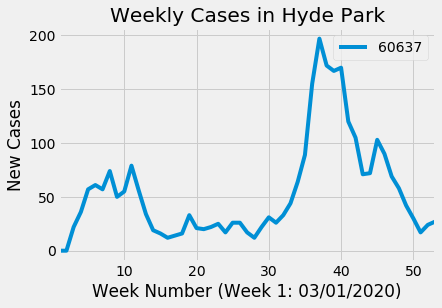

In [262]:
df6.plot(y='60637')
plots.ylabel('New Cases')
plots.title('Weekly Cases in Hyde Park')
plots.xlabel('Week Number (Week 1: 03/01/2020)')

In [263]:
df7 = (100. * df6 / df6.sum()).round(1)

In [264]:
df7

ZIP Code,60601,60602,60603,60604,60605,60606,60607,60608,60609,60610,...,60653,60654,60655,60656,60657,60659,60660,60661,60707,60827
Week Number,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,...,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0
3,1.1,0.0,0.0,0.0,1.2,0.0,0.6,0.2,0.2,0.8,...,0.9,0.8,0.0,0.1,0.7,0.6,0.5,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.9,0.0,1.3,1.0,0.7,1.2,...,2.0,1.0,0.9,0.8,0.9,1.1,0.8,1.3,0.6,2.8
5,0.5,0.0,0.0,0.0,0.8,0.4,1.4,1.0,0.8,0.6,...,2.1,0.7,1.4,0.8,0.8,1.8,1.1,0.4,0.8,1.4
6,0.5,0.0,0.0,0.0,0.8,0.7,8.9,1.6,1.2,0.5,...,2.7,2.2,1.2,1.0,0.7,1.7,2.1,0.3,0.8,1.1
7,0.3,2.1,0.0,0.0,1.6,2.2,1.6,1.7,2.3,0.5,...,2.7,1.0,1.1,0.9,0.4,2.2,2.7,0.4,1.3,2.1
8,0.8,0.0,0.0,2.4,1.5,0.7,0.8,2.6,3.3,0.7,...,2.1,0.4,0.9,1.0,0.6,2.4,1.7,0.6,2.5,3.9
9,1.4,0.0,0.0,5.9,1.0,0.7,2.1,4.7,4.5,0.7,...,1.7,0.3,0.7,1.2,0.7,2.6,2.0,0.4,3.4,3.2


Text(0.5, 0, 'Week Number (Week 1: 03/01/2020)')

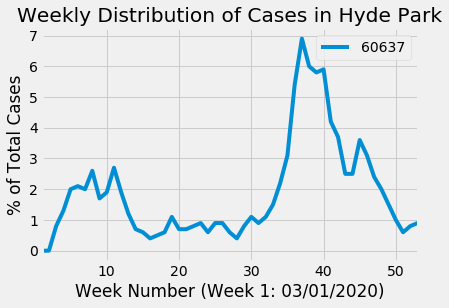

In [265]:
df7.plot(y='60637')
plots.ylabel('% of Total Cases')
plots.title('Weekly Distribution of Cases in Hyde Park')
plots.xlabel('Week Number (Week 1: 03/01/2020)')

In [266]:
x = np.arange(1,54)
y = df7['60637']
knots = np.arange(11.4,52,10.4)
knots

array([11.4, 21.8, 32.2, 42.6])

In [267]:
t, c, k = interpolate.splrep(x, y, s=0, k=3, task=-1, t=knots)
print('''\
t: {}
c: {}
k: {}
'''.format(t, c, k))
N = 100
xmin, xmax = x.min(), x.max()
xx = np.linspace(xmin, xmax, N)
spline = interpolate.BSpline(t, c, k, extrapolate=False)

t: [ 1.   1.   1.   1.  11.4 21.8 32.2 42.6 53.  53.  53.  53. ]
c: [-0.4752353   2.9134384   1.57494069  0.03734188  1.06354249  8.39182182
 -1.31352801  1.31680809  0.          0.          0.          0.        ]
k: 3



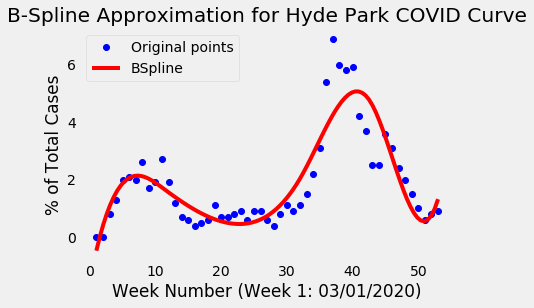

In [268]:
plots.plot(x, y, 'bo', label='Original points')
plots.plot(xx, spline(xx), 'r', label='BSpline')
plots.grid()
plots.legend(loc='best')
plots.title("B-Spline Approximation for Hyde Park COVID Curve")
plots.ylabel('% of Total Cases')
plots.xlabel('Week Number (Week 1: 03/01/2020)')
plots.show()

In [364]:
y = df7['60614']
t, c, k = interpolate.splrep(x, y, s=0, k=3, task=-1, t=knots)
print('''\
t: {}
c: {}
k: {}
'''.format(t, c, k))
N = 100
xmin, xmax = x.min(), x.max()
xx = np.linspace(xmin, xmax, N)
spline = interpolate.BSpline(t, c, k, extrapolate=False)

t: [ 1.   1.   1.   1.  11.4 21.8 32.2 42.6 53.  53.  53.  53. ]
c: [-0.08343559  1.39911229  1.04182414 -0.29462596  3.02621154  6.9475959
 -0.48497241  1.5375124   0.          0.          0.          0.        ]
k: 3



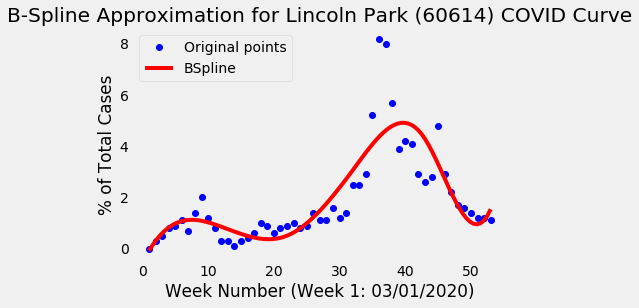

In [367]:
plots.plot(x, y, 'bo', label='Original points')
plots.plot(xx, spline(xx), 'r', label='BSpline')
plots.grid()
plots.legend(loc='best')
plots.title("B-Spline Approximation for Lincoln Park (60614) COVID Curve")
plots.ylabel('% of Total Cases')
plots.xlabel('Week Number (Week 1: 03/01/2020)')
plots.show()

In [382]:
y = df7['60623']
t, c, k = interpolate.splrep(x, y, s=0, k=3, task=-1, t=knots)
print('''\
t: {}
c: {}
k: {}
'''.format(t, c, k))
N = 100
xmin, xmax = x.min(), x.max()
xx = np.linspace(xmin, xmax, N)
spline = interpolate.BSpline(t, c, k, extrapolate=False)

t: [ 1.   1.   1.   1.  11.4 21.8 32.2 42.6 53.  53.  53.  53. ]
c: [-1.09995322  2.7656615   4.90152342 -1.86866132  2.61780932  5.80950581
 -0.91324945  0.73982212  0.          0.          0.          0.        ]
k: 3



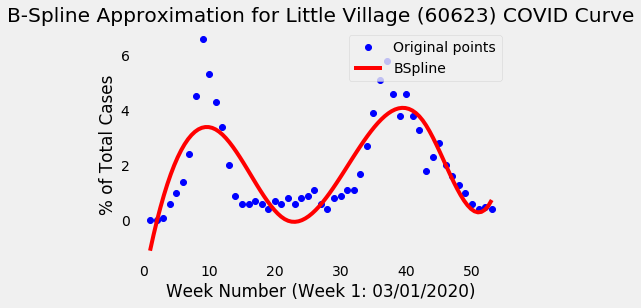

In [384]:
plots.plot(x, y, 'bo', label='Original points')
plots.plot(xx, spline(xx), 'r', label='BSpline')
plots.grid()
plots.legend(loc='best')
plots.title("B-Spline Approximation for Little Village (60623) COVID Curve")
plots.ylabel('% of Total Cases')
plots.xlabel('Week Number (Week 1: 03/01/2020)')
plots.show()

In [405]:
y = df7['60604']
t, c, k = interpolate.splrep(x, y, s=0, k=3, task=-1, t=knots)
print('''\
t: {}
c: {}
k: {}
'''.format(t, c, k))
N = 100
xmin, xmax = x.min(), x.max()
xx = np.linspace(xmin, xmax, N)
spline = interpolate.BSpline(t, c, k, extrapolate=False)

t: [ 1.   1.   1.   1.  11.4 21.8 32.2 42.6 53.  53.  53.  53. ]
c: [-0.20861851 -0.59233643  6.01253393 -3.3926664   4.87246609  5.78600161
 -1.35630864  1.22264531  0.          0.          0.          0.        ]
k: 3



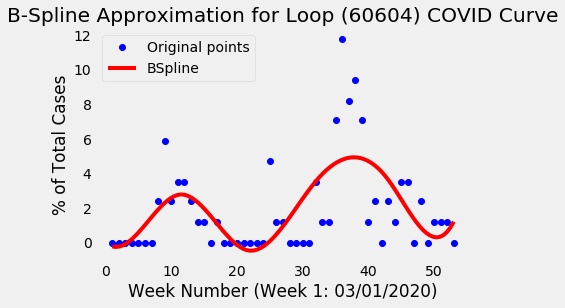

In [406]:
plots.plot(x, y, 'bo', label='Original points')
plots.plot(xx, spline(xx), 'r', label='BSpline')
plots.grid()
plots.legend(loc='best')
plots.title("B-Spline Approximation for Loop (60604) COVID Curve")
plots.ylabel('% of Total Cases')
plots.xlabel('Week Number (Week 1: 03/01/2020)')
plots.show()

In [349]:
coef = pd.DataFrame(columns=['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12'])
i = 0
for i in range(58):
    y = df7.iloc[:,i]
    t, c, k = interpolate.splrep(x, y, s=0, k=3, task=-1, t=knots)
    coef.loc[i] = c

In [350]:
coef

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12
0,0.028362,1.245054,0.152926,0.476131,1.871816,9.089737,-1.475276,1.469815,0.0,0.0,0.0,0.0
1,-0.010596,-0.497195,3.393803,-1.776056,3.360955,5.186757,2.247143,2.485319,0.0,0.0,0.0,0.0
2,-0.087607,0.195165,-0.066424,1.458173,-0.192935,9.613468,1.784175,0.737313,0.0,0.0,0.0,0.0
3,-0.208619,-0.592336,6.012534,-3.392666,4.872466,5.786002,-1.356309,1.222645,0.0,0.0,0.0,0.0
4,0.025038,1.313982,1.201006,-0.237445,2.115236,8.563380,-1.693444,1.982951,0.0,0.0,0.0,0.0
5,-0.296785,0.991759,0.543421,1.054696,1.385389,8.356881,-1.220069,2.243831,0.0,0.0,0.0,0.0
6,-0.894009,5.021595,-0.538964,0.417543,2.141944,6.947874,-0.577916,1.083353,0.0,0.0,0.0,0.0
7,-0.702684,2.352182,2.933145,-0.840789,2.400831,6.942285,-1.254016,1.043037,0.0,0.0,0.0,0.0
8,-0.722710,2.002865,4.043578,-1.282353,2.458382,6.281162,-0.786006,1.086996,0.0,0.0,0.0,0.0
9,0.282925,0.498005,1.429652,-0.562005,3.233663,7.079866,-0.532743,1.676226,0.0,0.0,0.0,0.0


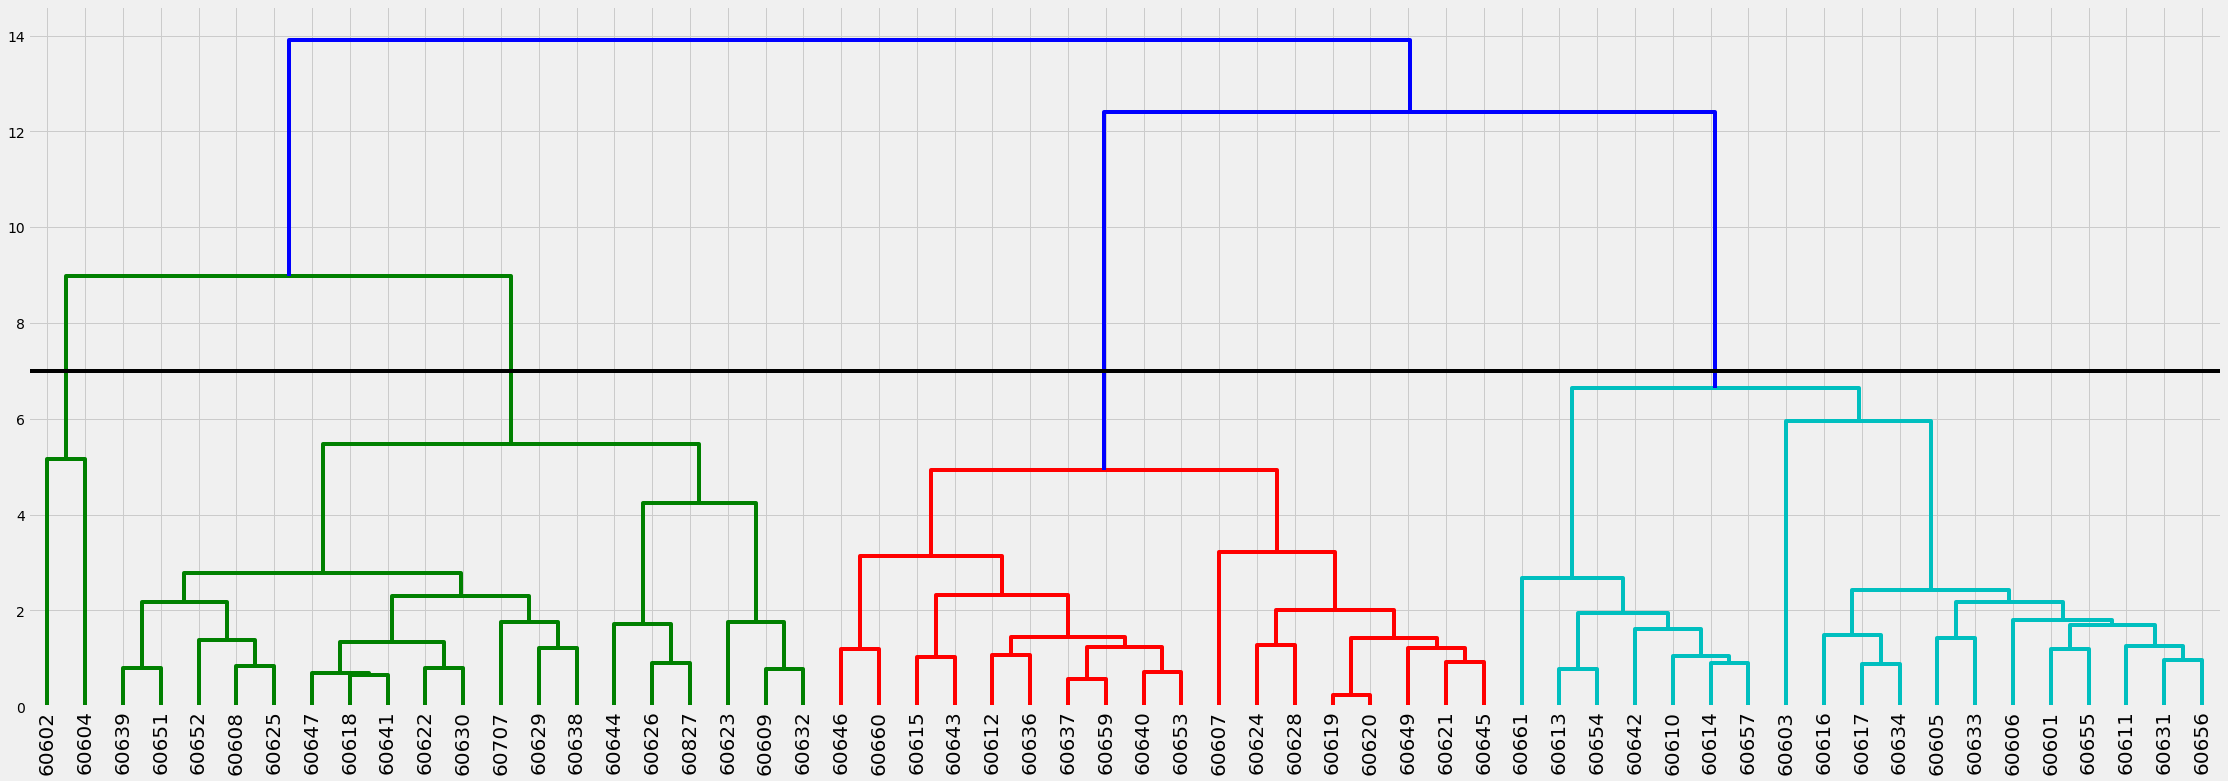

In [389]:
clust = linkage(coef, 'ward')

LabelList = list(df7)

plots.figure(figsize=(35, 12))  
dendrogram(clust,  
            orientation='top',
            labels=LabelList,
            distance_sort='descending')
plots.xticks(size = 20)
plots.axhline(y=7, color='black', linestyle='-')
plots.show()

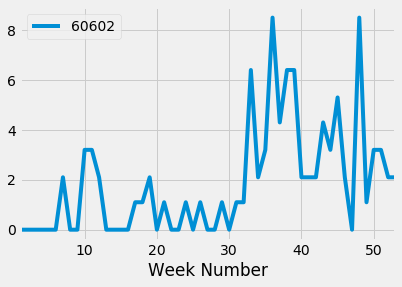

In [358]:
df7.plot(y='60602')

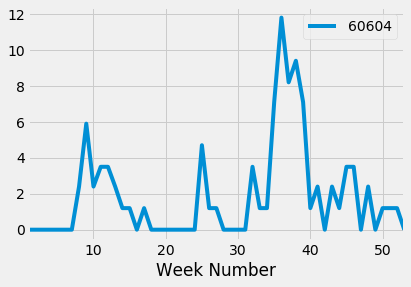

In [359]:
df7.plot(y='60604')

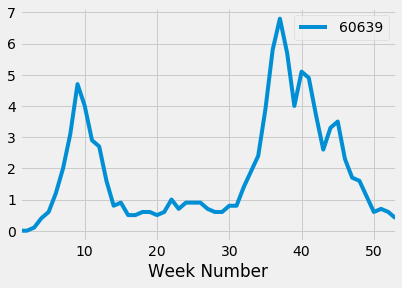

In [360]:
df7.plot(y='60639')

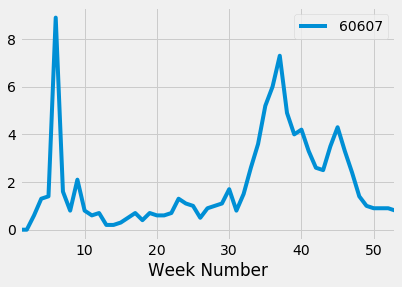

In [361]:
df7.plot(y='60607')

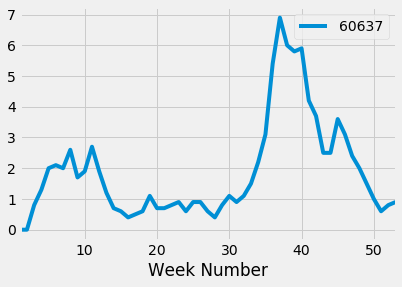

In [362]:
df7.plot(y='60637')

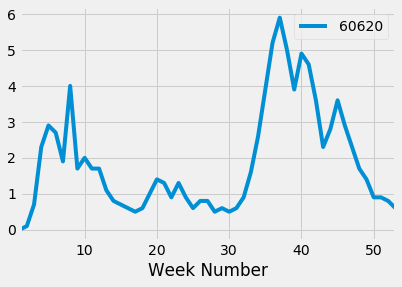

In [363]:
df7.plot(y='60620')

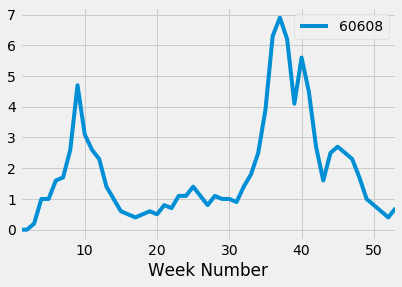

In [344]:
df7.plot(y='60608')

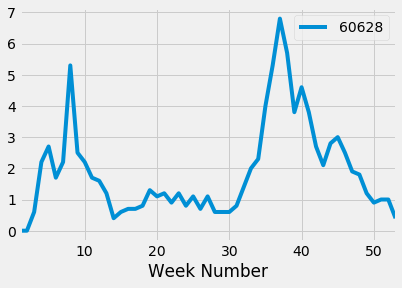

In [345]:
df7.plot(y='60628')